#1) set up our environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2) load and explore data

In [30]:
df=pd.read_csv("/content/internship_data.csv")

In [31]:
df.head()

,Enrollment_ID,Student_Name,Program,Enrollment_Date,Completion_Date,Dropout,Status
0,98742,Ashley Morris,data analysis,2024-09-21,2025-02-14,False,Completed
1,26242,Jennifer Rogers,data analysis,2024-10-04,2025-01-16,False,Completed
2,79712,Sean Lee,AI/ML,2024-04-30,NaN,True,Dropped
3,78784,Meredith Sims,Data Science,2024-01-20,2024-06-18,False,Completed
4,66864,Heather Ritter,Cybersecurity,2023-04-28,2023-07-22,False,Completed


In [32]:
df.shape

(3000, 7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Enrollment_ID    3000 non-null   int64 
 1   Student_Name     3000 non-null   object
 2   Program          3000 non-null   object
 3   Enrollment_Date  3000 non-null   object
 4   Completion_Date  1761 non-null   object
 5   Dropout          3000 non-null   bool  
 6   Status           3000 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 143.7+ KB


# 3) Data cleaning and praperation

In [34]:
# Convert date columns to datetime
df['Enrollment_Date'] = pd.to_datetime(df['Enrollment_Date'])
df['Completion_Date'] = pd.to_datetime(df['Completion_Date'])


In [35]:
df.dtypes

,0
Enrollment_ID,int64
Student_Name,object
Program,object
Enrollment_Date,datetime64[ns]
Completion_Date,datetime64[ns]
Dropout,bool
Status,object


In [36]:
# Calculate program duration in days (for completed programs)
df['Duration_Days'] = (df['Completion_Date'] - df['Enrollment_Date']).dt.days

In [37]:
# Create a binary column for completion status (1 = Completed, 0 = Dropped/Ongoing)
df['Completion_Status'] = df['Status'].apply(lambda x: 1 if x == 'Completed' else 0)

In [38]:
# Extract month and year from enrollment date for time-based analysis
df['Enrollment_Month'] = df['Enrollment_Date'].dt.month
df['Enrollment_Year'] = df['Enrollment_Date'].dt.year

In [39]:
df.head()

,Enrollment_ID,Student_Name,Program,Enrollment_Date,Completion_Date,Dropout,Status,Duration_Days,Completion_Status,Enrollment_Month,Enrollment_Year
0,98742,Ashley Morris,data analysis,2024-09-21,2025-02-14,False,Completed,146.0,1,9,2024
1,26242,Jennifer Rogers,data analysis,2024-10-04,2025-01-16,False,Completed,104.0,1,10,2024
2,79712,Sean Lee,AI/ML,2024-04-30,NaT,True,Dropped,NaN,0,4,2024
3,78784,Meredith Sims,Data Science,2024-01-20,2024-06-18,False,Completed,150.0,1,1,2024
4,66864,Heather Ritter,Cybersecurity,2023-04-28,2023-07-22,False,Completed,85.0,1,4,2023


# 4) Department Analysis

In [40]:
# Calculate completion rates by program
completion_rates = df.groupby('Program')['Completion_Status'].agg(['mean', 'count'])
completion_rates = completion_rates.rename(columns={'mean': 'Completion_Rate', 'count': 'Total_Students'})
completion_rates = completion_rates.sort_values('Completion_Rate', ascending=False)

print(completion_rates)



                    Completion_Rate  Total_Students
Program                                            
Web Development            0.640483             331
game development           0.616667              60
Graphic Designing          0.612022             183
data analysis              0.603834             626
Data Science               0.586998             523
app development            0.578358             268
AI/ML                      0.565757             403
Cybersecurity              0.558559             444
Business Analytics         0.518519             162


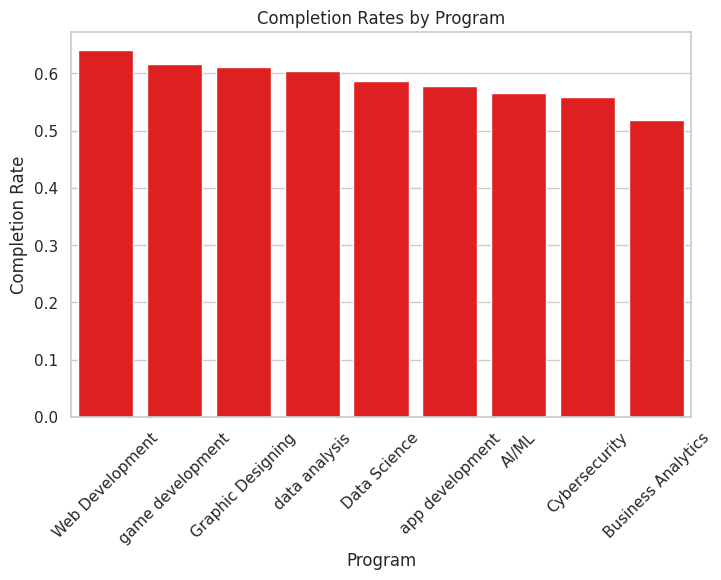

In [41]:
# Visualize completion rates
plt.figure(figsize=(8, 5))
sns.barplot(x=completion_rates.index, y='Completion_Rate', data=completion_rates,color="red")
plt.title('Completion Rates by Program')
plt.xticks(rotation=45)
plt.ylabel('Completion Rate')
plt.show()

# 5)Duration Analysis
## Average Duration by Department

In [42]:
# Calculate average duration by program (only for completed programs)
duration_stats = df[df['Status'] == 'Completed'].groupby('Program')['Duration_Days'].agg(['mean', 'median', 'std', 'count'])
duration_stats = duration_stats.sort_values('mean', ascending=False)

print(duration_stats)



                          mean  median        std  count
Program                                                 
Graphic Designing   127.758929   127.5  31.486947    112
Business Analytics  122.976190   121.0  33.953184     84
game development    122.351351   124.0  38.132966     37
data analysis       121.891534   121.5  34.956910    378
Data Science        120.804560   121.0  35.163404    307
Cybersecurity       120.350806   120.5  34.475743    248
AI/ML               118.495614   118.5  34.092191    228
Web Development     118.235849   119.5  34.259548    212
app development     116.451613   114.0  34.087586    155


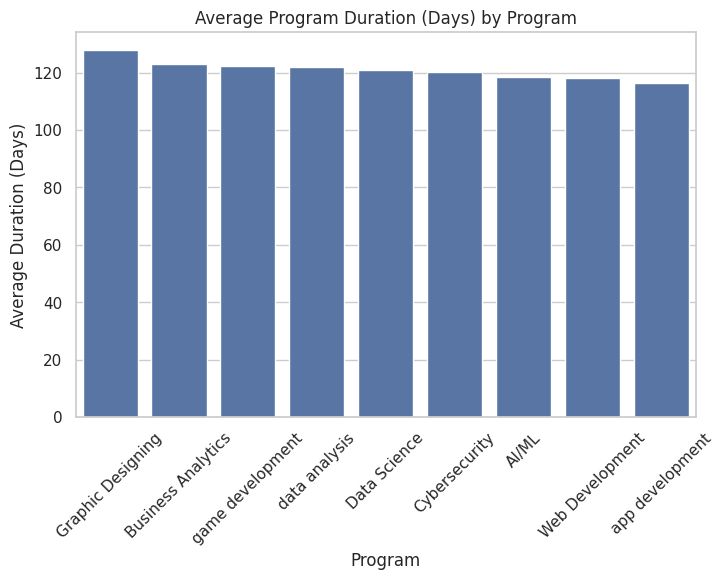

In [46]:
# Visualize average duration
plt.figure(figsize=(8, 5))
sns.barplot(x=duration_stats.index, y='mean', data=duration_stats)
plt.title('Average Program Duration (Days) by Program')
plt.xticks(rotation=45)
plt.ylabel('Average Duration (Days)')
plt.show()

## Duration Distribution

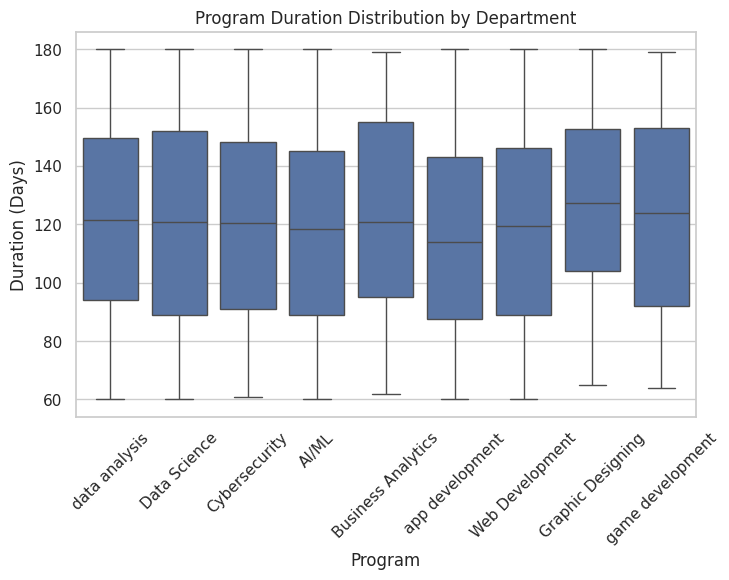

In [45]:
# Plot duration distribution by program
plt.figure(figsize=(8, 5))
sns.boxplot(x='Program', y='Duration_Days', data=df[df['Status'] == 'Completed'])
plt.title('Program Duration Distribution by Department')
plt.xticks(rotation=45)
plt.ylabel('Duration (Days)')
plt.show()

# 6) Time-Based Trends
## Enrollment Trends Over Time

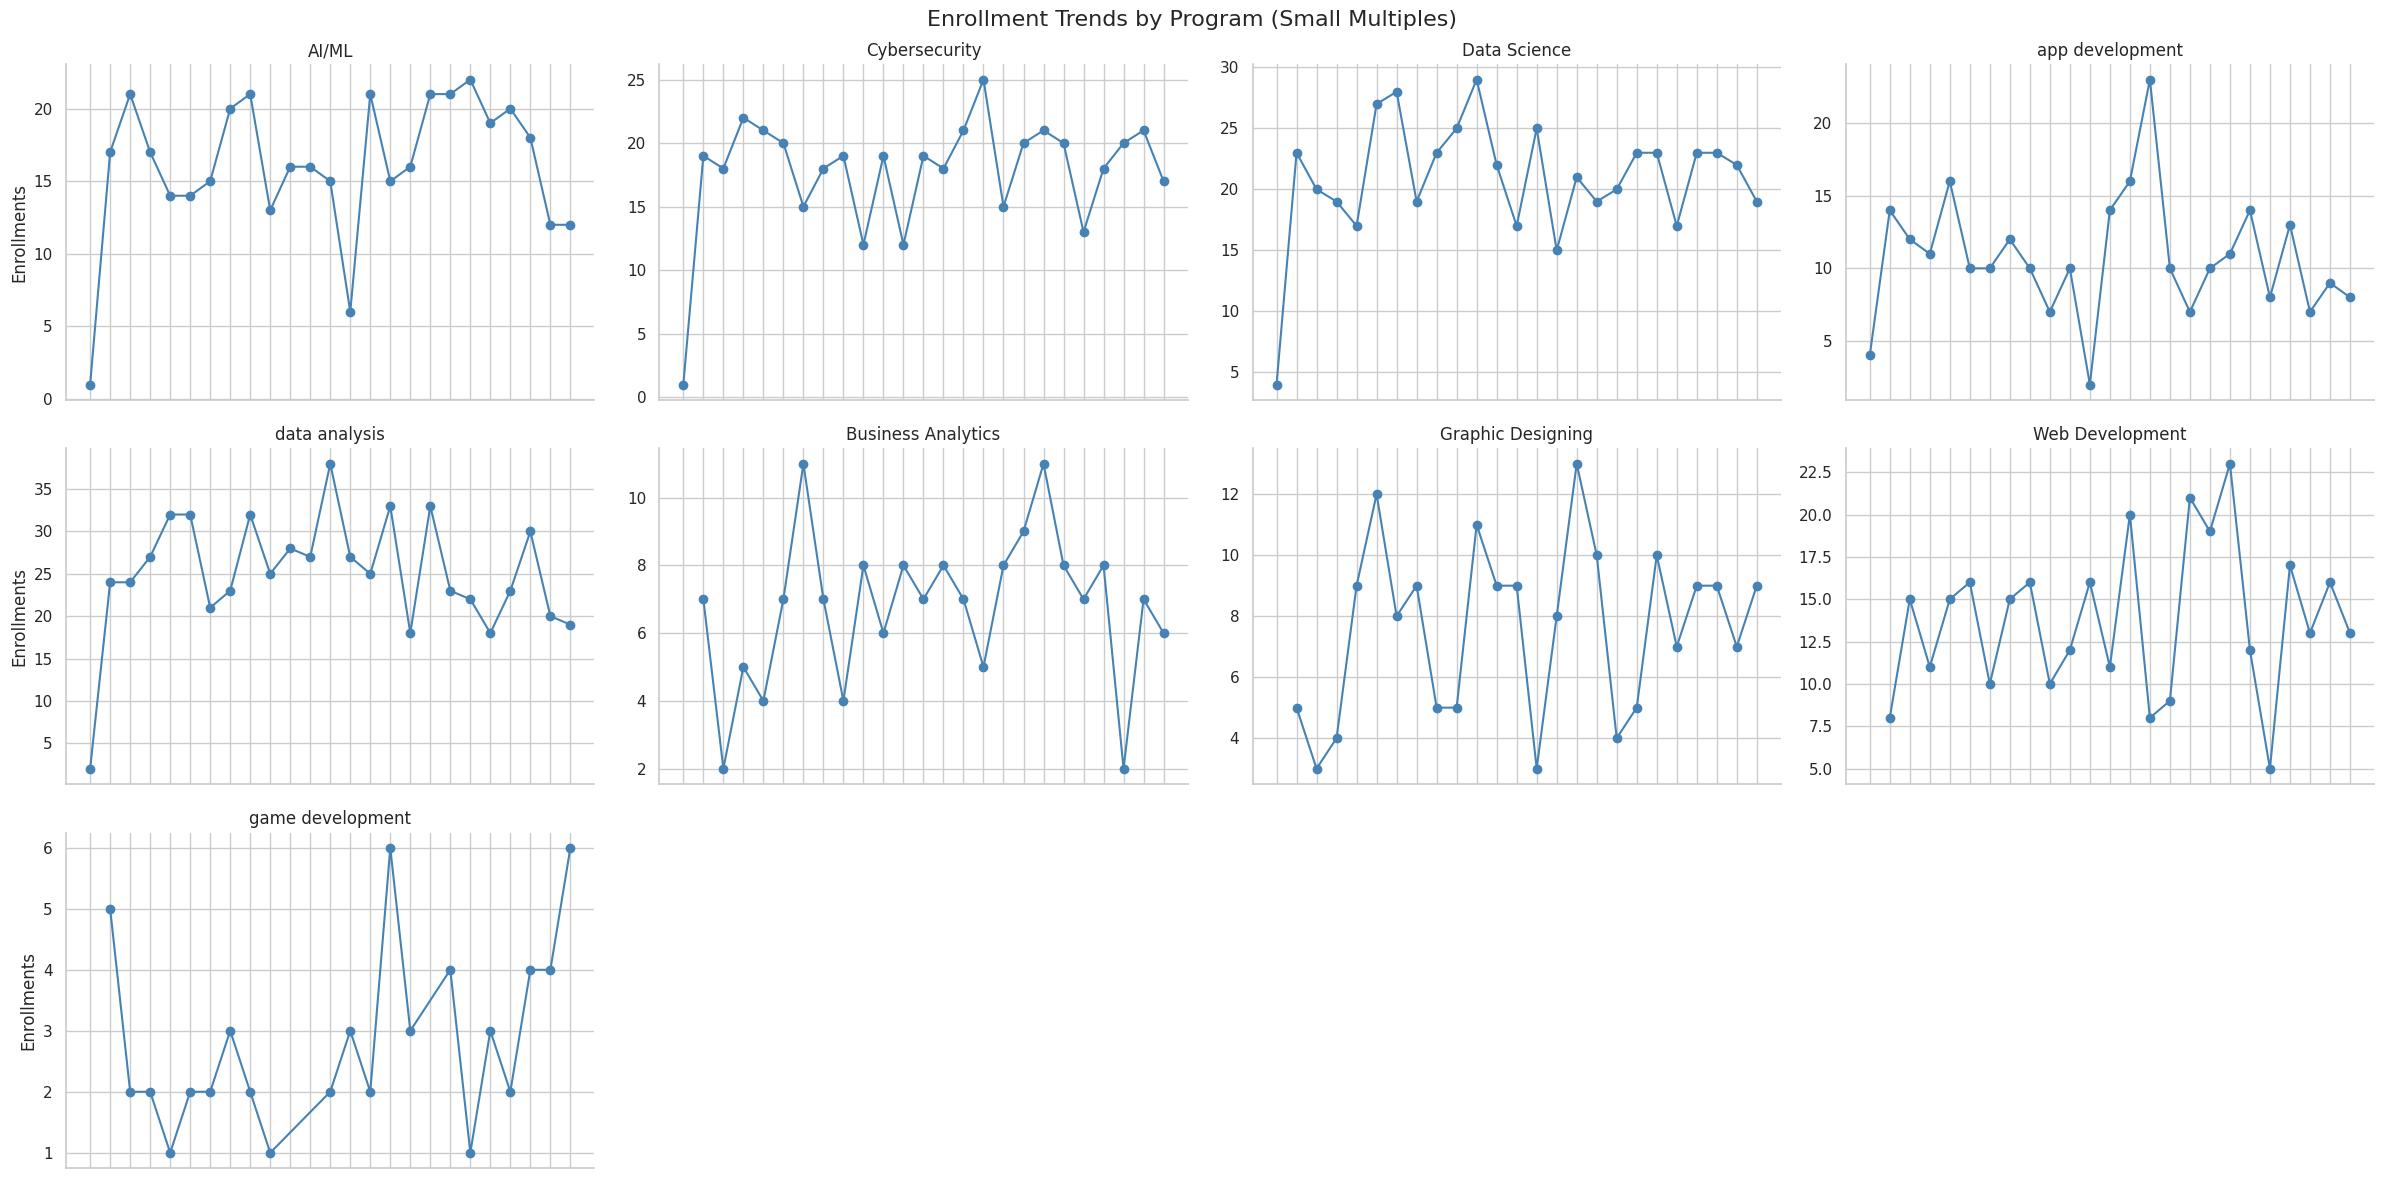

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
enrollment_data = df.groupby(['Enrollment_Year', 'Enrollment_Month', 'Program']).size().reset_index(name='Enrollments')
enrollment_data['Year-Month'] = enrollment_data['Enrollment_Year'].astype(str) + '-' + enrollment_data['Enrollment_Month'].astype(str).str.pad(2, fillchar='0')

# Create the facet grid
g = sns.FacetGrid(enrollment_data,
                  col='Program',  # Create one subplot per program
                  col_wrap=4,     # 4 plots per row
                  height=4,       # Height of each subplot
                  aspect=1.5,     # Width/height ratio
                  sharey=False)   # Let each subplot have its own y-axis scale

# Map a line plot to each subplot
g.map(plt.plot, 'Year-Month', 'Enrollments', marker='o', color='steelblue')

# Customize the grid
g.set_titles("{col_name}")  # Use program names as titles
g.set_xticklabels(rotation=45, ha='right')  # Rotate x-axis labels

# Add overall title and adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Enrollment Trends by Program (Small Multiples)', fontsize=16)

# Set common axis labels
g.set_axis_labels("", "Enrollments")

plt.tight_layout()
plt.show()

## Completion Rate Trends Over Time

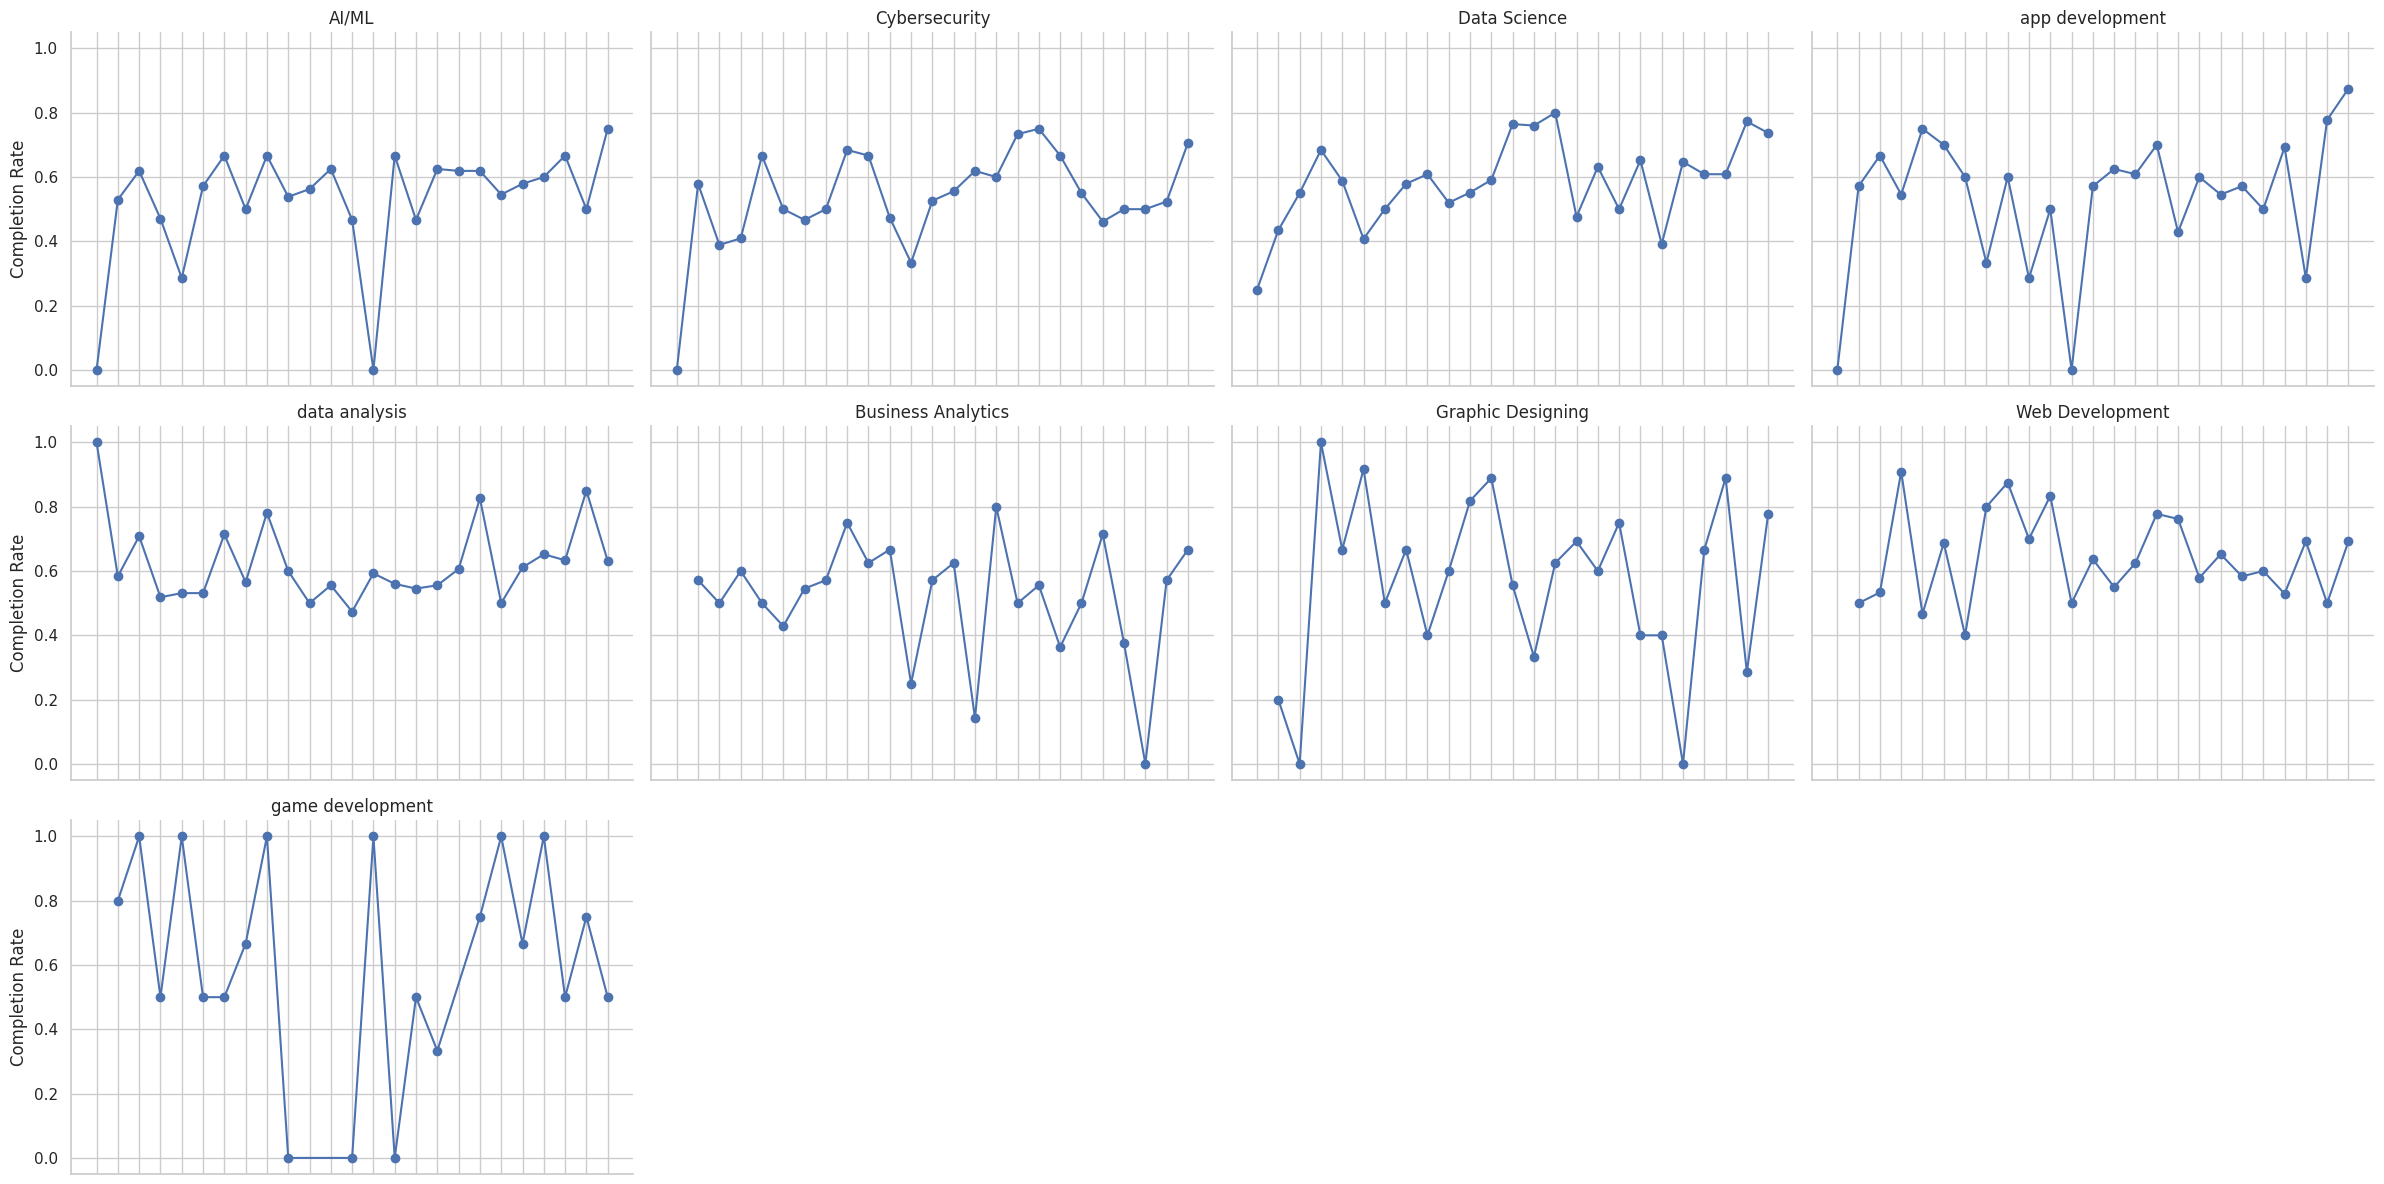

In [52]:
# Pivot the data for faceting
completion_trends = df.groupby(['Year_Month', 'Program'])['Completion_Status'].mean().reset_index()

# Convert 'Year_Month' to strings for plotting
completion_trends['Year_Month'] = completion_trends['Year_Month'].astype(str)  # Convert to strings

# Create small multiples
g = sns.FacetGrid(completion_trends, col='Program', col_wrap=4, height=4, aspect=1.5)
g.map(plt.plot, 'Year_Month', 'Completion_Status', marker='o')
g.set_xticklabels(rotation=45)
g.set_titles("{col_name}")
g.set_axis_labels("", "Completion Rate")
plt.tight_layout()
plt.show()

# 7) Correlation Analysis
##  Duration vs. Completion Rate

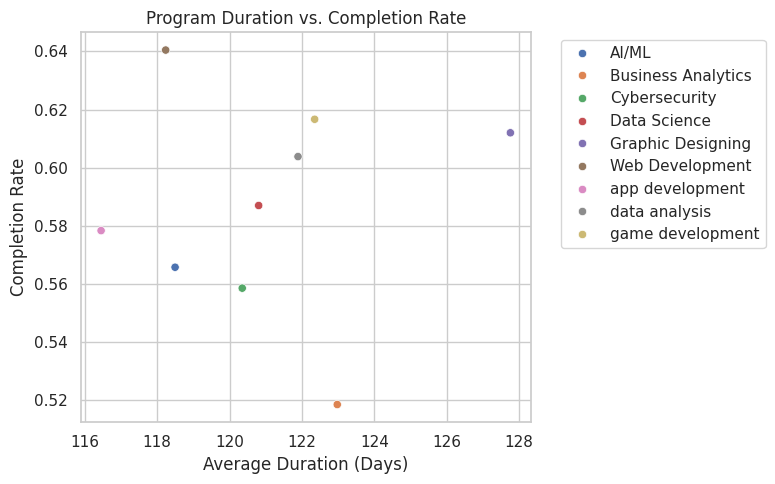

Correlation between duration and completion rate: 0.05


In [58]:
# Calculate correlation between duration and completion
duration_completion = df[df['Status'] == 'Completed'].groupby('Program')['Duration_Days'].mean()
completion_rates = df.groupby('Program')['Completion_Status'].mean()

correlation_df = pd.DataFrame({
    'Average_Duration': duration_completion,
    'Completion_Rate': completion_rates
})

# Plot correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Average_Duration', y='Completion_Rate', data=correlation_df, hue=correlation_df.index)
plt.title('Program Duration vs. Completion Rate')
plt.xlabel('Average Duration (Days)')
plt.ylabel('Completion Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = correlation_df['Average_Duration'].corr(correlation_df['Completion_Rate'])
print(f"Correlation between duration and completion rate: {correlation:.2f}")

# 8) Advanced Analysis - Survival Analysis (Time to Dropout)

In [60]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=71c0e3fdac580d572457a28c84e3707124cbaf4d00deb4620e70e92e8ac21f49
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


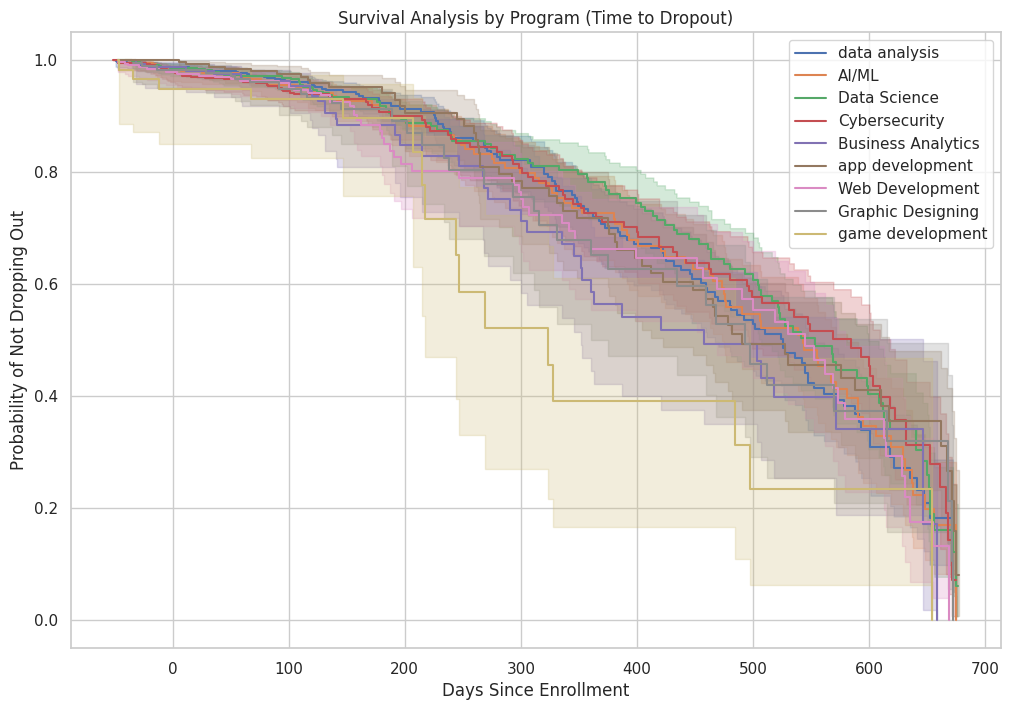

In [62]:
from lifelines import KaplanMeierFitter



today = pd.to_datetime('2025-02-01')

df_survival = df.copy()
df_survival['event_observed'] = df_survival['Dropout'].astype(int)
df_survival['duration'] = np.where(
    df_survival['Status'] == 'Completed',
    df_survival['Duration_Days'],
    (today - df_survival['Enrollment_Date']).dt.days
)

# Plot survival curves by program
plt.figure(figsize=(12, 8))
for program in df_survival['Program'].unique():
    kmf = KaplanMeierFitter()
    program_data = df_survival[df_survival['Program'] == program]
    kmf.fit(program_data['duration'], program_data['event_observed'], label=program)
    kmf.plot_survival_function()

plt.title('Survival Analysis by Program (Time to Dropout)')
plt.xlabel('Days Since Enrollment')
plt.ylabel('Probability of Not Dropping Out')
plt.show()

## **Insights from Internship Data Analysis**

### **Department-wise Completion Trends:**
#### ✅ **Highest Completion Rates**:
- **Web Development**: **64.05%** completion  
- **Game Development**: **61.67%**  
- **Graphic Designing**: **61.20%**  

#### ❌ **Lowest Completion Rates**:
- **Business Analytics**: **51.85%**  
- **Cybersecurity**: **55.86%**  
- **AI/ML**: **56.58%**  

---

### **Duration Insights**:
- Completed programs range from **60 to 180 days**  
- The average duration is clustered around **85-150 days** based on sample data  
---

### **Next Steps for Deeper Insights**:
- Investigate **why technical programs (Web/Game Dev) outperform analytics-based programs** in completion rates.  
- Analyze how **internship duration correlates with successful outcomes** and **early dropouts**.  
